In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.DataFrame(
    {
        'name' : ['Subhra', 'Kalyani', 'Subir', 'Amal'],
        'city' : ['Kalyani', 'Ranchi', 'Vizag', 'Mumbai'],
        'age': [21, 22,'',25],
        'children' : ['',2,1,''],
        'education' : ['MStat', 'MSc', 'ME', 'PhD']
    }
)

In [37]:
df

,name,city,age,children,education
0,Subhra,Kalyani,21,,MStat
1,Kalyani,Ranchi,22,2,MSc
2,Subir,Vizag,,1,ME
3,Amal,Mumbai,25,,PhD


# Null Values

In [38]:
df = df.replace('', np.nan)
df = df.replace(' ', np.nan)
df.isnull().sum()

name         0
city         0
age          1
children     2
education    0
dtype: int64

## Know the rows containing null values

In [39]:
df[df.isnull().any(axis=1)].head()

,name,city,age,children,education
0,Subhra,Kalyani,21.0,NaN,MStat
2,Subir,Vizag,NaN,1.0,ME
3,Amal,Mumbai,25.0,NaN,PhD


In [40]:
df.dtypes

name          object
city          object
age          float64
children     float64
education     object
dtype: object

## Filling up numeric nulls

In [41]:
df = df.fillna(df.mean())

# Changing datatypes

In [42]:
df[['age', 'children']] = df[['age', 'children']].astype(int)

In [43]:
df.dtypes

name         object
city         object
age           int64
children      int64
education    object
dtype: object

# Deriving high level stats

In [45]:
df.describe()

,age,children
count,4.000000,4.00
mean,22.500000,1.25
std,1.732051,0.50
min,21.000000,1.00
25%,21.750000,1.00
50%,22.000000,1.00
75%,22.750000,1.25
max,25.000000,2.00


# Correlation

In [47]:
iris = sns.load_dataset('iris')
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


# Graphing

In [57]:
sns.set_theme(style='darkgrid')

## Scatterplot

<AxesSubplot:xlabel='col1', ylabel='col2'>

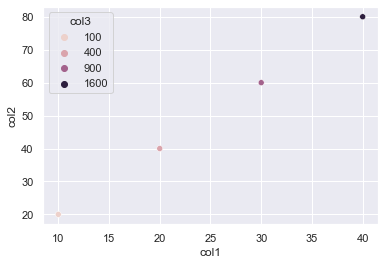

In [58]:
df = pd.DataFrame({
    'col1': [10, 20, 30, 40],
    'col2' : [20, 40, 60, 80],
    'col3' : [100, 400, 900, 1600]
})

sns.scatterplot(x='col1', y='col2', data=df, hue='col3')

<AxesSubplot:xlabel='col1', ylabel='col2'>

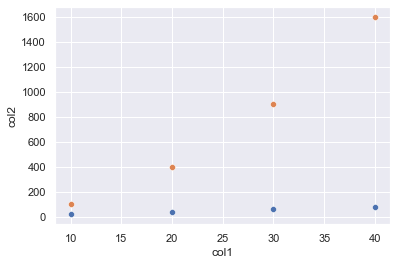

In [59]:
sns.scatterplot(x='col1', y='col2', data=df)
sns.scatterplot(x='col1', y='col3', data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

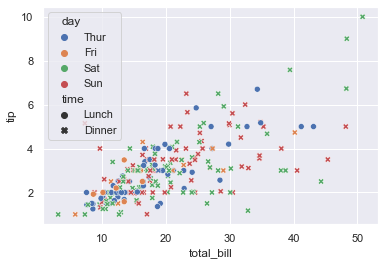

In [62]:
tips = sns.load_dataset('tips')


sns.scatterplot(x='total_bill', y='tip', data = tips, hue='day', style='time')

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Pairplot
* Feature correlation
* Multi-collinearity
* Is the data separable linearly

In [63]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


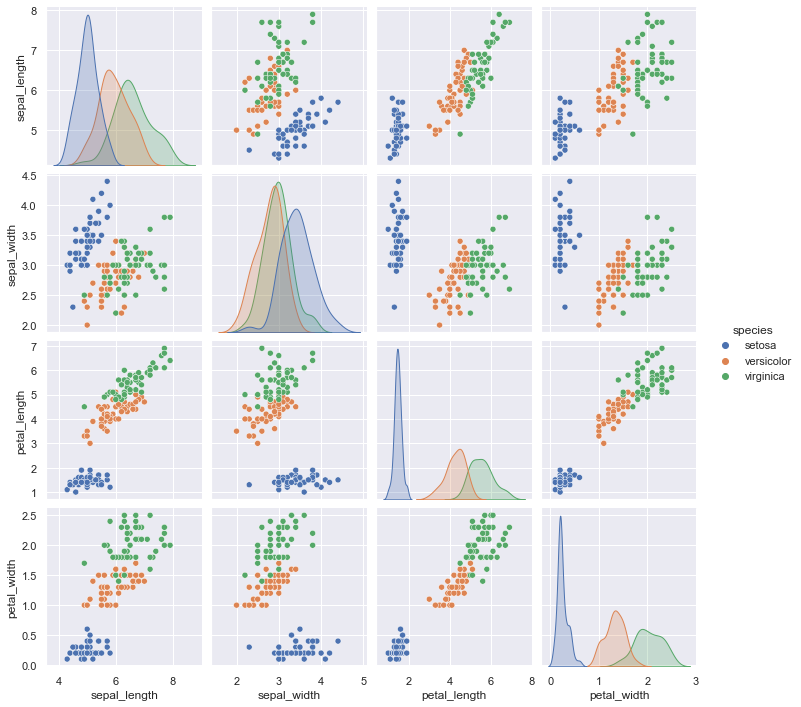

In [66]:
sns.pairplot(iris, hue='species')

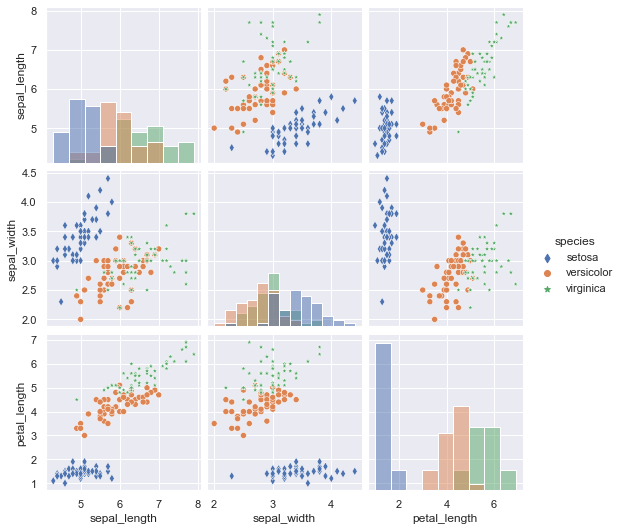

In [74]:
sns.pairplot(iris, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length'],
diag_kind='hist', markers=["d", "o", "*"])

## Heatmap

<AxesSubplot:>

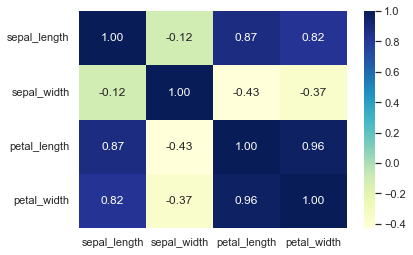

In [79]:
sns.heatmap(iris.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

## ViolinPlot

In [89]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [91]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [92]:
# Box plot 
# IQR = (Q3 - Q1)
# Lower limit = Q1 - 1.5 * IQR
# Upper limit = Q3 + 1.5 * IQR
24.1275 + 1.5 * (24.1275 - 13.3475)

40.2975

<AxesSubplot:xlabel='total_bill'>

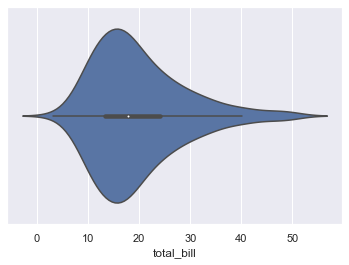

In [90]:
sns.violinplot(x='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

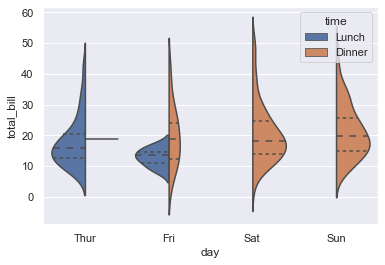

In [97]:
sns.violinplot(x='day', y='total_bill', data = tips, hue='time', split=True, inner='quart')

## Countplot

In [98]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='count', ylabel='class'>

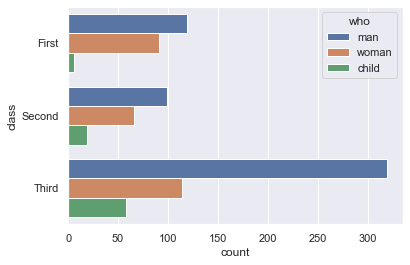

In [107]:
sns.countplot(y='class', hue='who', data=titanic)

<AxesSubplot:xlabel='count', ylabel='embark_town'>

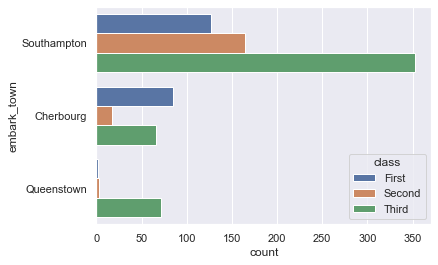

In [108]:
sns.countplot(y='embark_town', hue='class', data=titanic)

In [105]:
titanic[['class', 'survived']].groupby(['class']).count()

,survived
class,
First,216
Second,184
Third,491


## Catplot

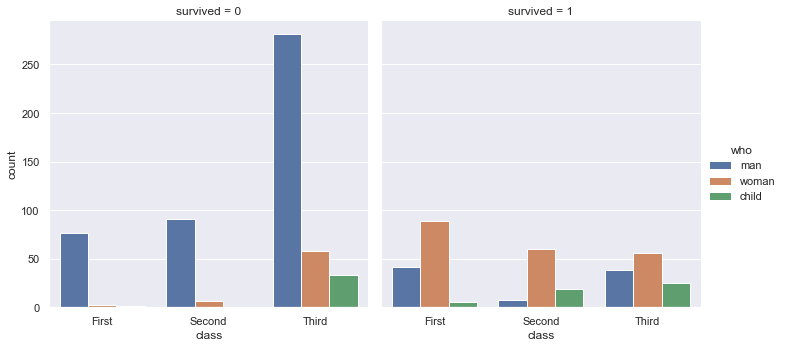

In [113]:
sns.catplot(x='class', hue='who', data=titanic, col='survived', kind='count')

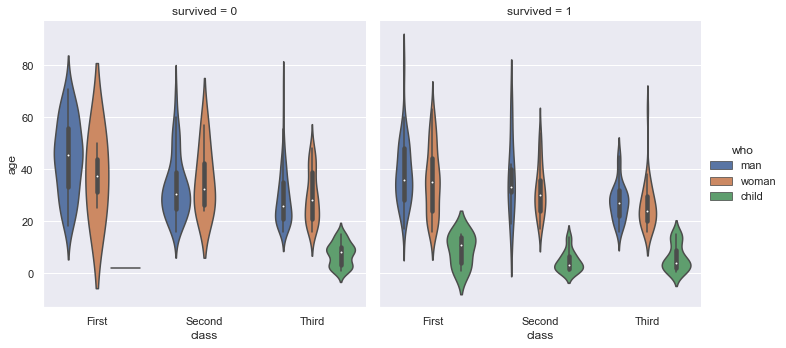

In [115]:
sns.catplot(x='class', y='age', hue='who', data=titanic, col='survived', kind='violin')

## Boxplot

<AxesSubplot:ylabel='total_bill'>

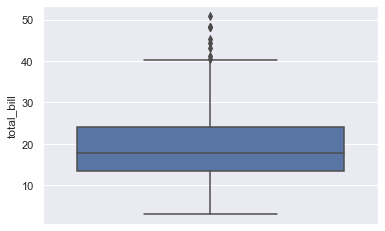

In [124]:
sns.boxplot(y=tips['total_bill'])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

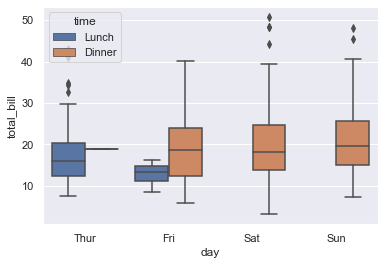

In [125]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='time')

## Swarmplot

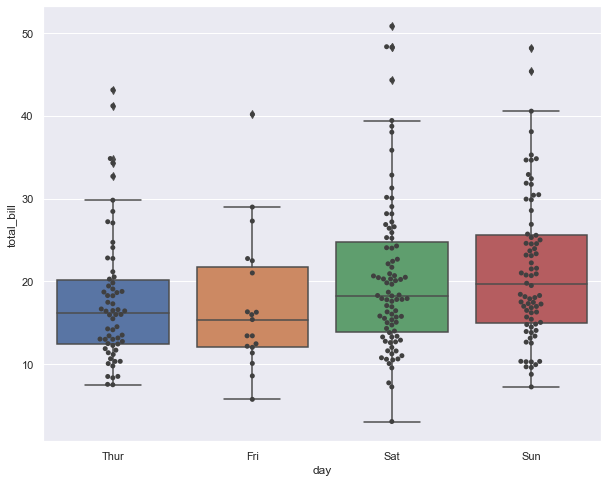

In [134]:
plt.figure(figsize=(10,8))
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color="0.25")
plt.show()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

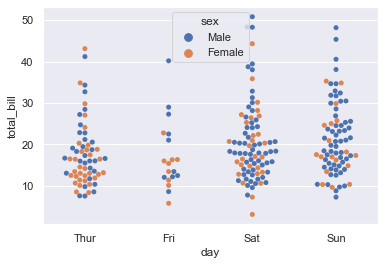

In [137]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')

# Group by

In [123]:
titanic[['class', 'age', 'who', 'survived', 'sibsp']].groupby(['survived', 'class',  'who']).agg(
    {
        'age' : ['count', 'mean', 'min', 'max'],
        'sibsp' : ['min', 'max', 'sum', 'count']
    }
)

age                         sibsp                
                      count       mean    min   max   min  max  sum count
survived class  who                                                      
0        First  child     1   2.000000   2.00   2.0   1.0  1.0    1     1
                man      61  44.581967  18.00  71.0   0.0  3.0   21    77
                woman     2  37.500000  25.00  50.0   0.0  1.0    1     2
         Second child     0        NaN    NaN   NaN   NaN  NaN    0     0
                man      84  33.369048  16.00  70.0   0.0  2.0   28    91
                woman     6  36.000000  24.00  57.0   0.0  1.0    3     6
         Third  child    33   7.378788   1.00  15.0   0.0  5.0  102    33
                man     196  29.209184  16.00  74.0   0.0  8.0   87   281
                woman    41  29.304878  16.00  48.0   0.0  8.0   61    58
1        First  child     5   8.984000   0.92  15.0   0.0  1.0    3     5
                man      37  38.756757  17.00  80.0   0.0  2.0   15    42
                woman    80  35.450000  16.00  63.0   0.0  3.0   49    89
         Second child    19   4.543684   0.67  14.0   0.0  2.0   15    19
                man       6  36.666667  19.00  62.0   0.0  1.0    1     8
                woman    58  31.784483  17.00  55.0   0.0  3.0   27    60
         Third  child    25   6.076800   0.42  15.0   0.0  4.0   23    25
                man      29  27.551724  16.00  45.0   0.0  2.0    7    38
                woman    31  25.935484  16.00  63.0   0.0  4.0   22    56

In [142]:
tips.groupby(['day', 'time']).sum().sort_values(by='tip', ascending=False)

total_bill     tip  size
day  time                            
Sat  Dinner     1778.40  260.40   219
Sun  Dinner     1627.16  247.39   216
Thur Lunch      1077.55  168.83   150
Fri  Dinner      235.96   35.28    26
     Lunch        89.92   16.68    14
Thur Dinner       18.78    3.00     2
Sat  Lunch         0.00    0.00     0
Sun  Lunch         0.00    0.00     0

In [140]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Pivot Table

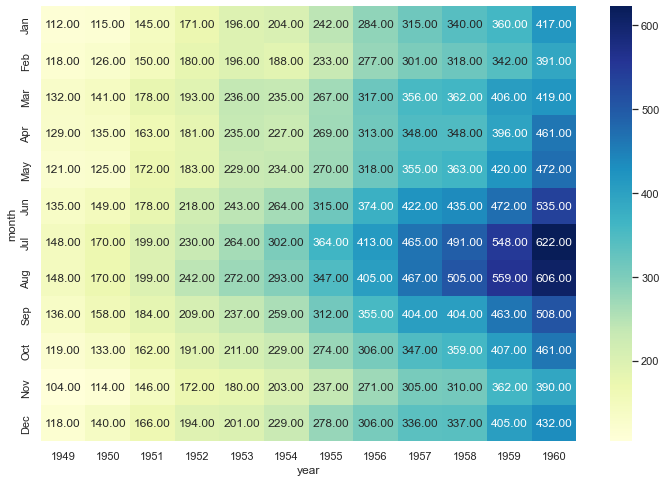

In [88]:
plt.figure(figsize=(12, 8))
flights = sns.load_dataset('flights')

flights = flights.pivot('month', 'year', 'passengers')
sns.heatmap(flights, annot=True, cmap='YlGnBu', fmt='.2f')
plt.show()


## Dataframe transformation

In [145]:
df = pd.DataFrame({'A' : [1,2],  'B': [10, 20]})
def square(x):
    return x * x

df1 = df.apply(square)
print(df)
print(df1)

   A   B
0  1  10
1  2  20
   A    B
0  1  100
1  4  400


In [147]:
df.apply(lambda x: x + 100)

,A,B
0,101,110
1,102,120


In [153]:
df = pd.DataFrame({
    'name' : ['alice', 'bob', 'charlie', 'david'],
    'age' : [10, 20, 15, 18]
})

def first_char(name):
    return name[0]

def concatenate(name, age):
    c = name + ' :: ' + str(age)
    return c

df['name_uppercase'] = df['name'].apply(lambda x: x.upper())
df['length'] =  df['name'].apply(lambda x: len(x))
df['initial'] = df['name'].apply(first_char)

df['code'] = df.apply(lambda x: concatenate(x['name'], x['age']), axis=1)

df.head()

,name,age,name_uppercase,length,initial,code
0,alice,10,ALICE,5,a,alice :: 10
1,bob,20,BOB,3,b,bob :: 20
2,charlie,15,CHARLIE,7,c,charlie :: 15
3,david,18,DAVID,5,d,david :: 18


# Melt

In [160]:
df = pd.DataFrame({
    'name' : ['alice', 'bob', 'charlie', 'david'],
    'property': ['house', 'bungalow', 'townhouse', 'bungalow'],
    'age' : [10, 20, 15, 18],
    'passion': ['farming', 'photography', 'philately', 'ornithology']
})

df

,name,property,age,passion
0,alice,house,10,farming
1,bob,bungalow,20,photography
2,charlie,townhouse,15,philately
3,david,bungalow,18,ornithology


In [165]:
df.melt(id_vars=["name", "property"], value_vars=['age'],
var_name='Attribute', value_name='Value')

,name,property,Attribute,Value
0,alice,house,age,10
1,bob,bungalow,age,20
2,charlie,townhouse,age,15
3,david,bungalow,age,18
